In [1]:
# depth=0 messages
import csv
import json
import numpy as np
import pandas as pd

data_dir = "/data/sangyiwu/RBSEO_Cybercrime_TimeMachine/output_telegram/channels_groups"
result_stats_file = f"/data/sangyiwu/RBSEO_Cybercrime_TimeMachine/output_telegram/result_stats.json"

msg_total = 0
msg_cybercrime = 0
msg_type_cnt = dict()

with open(result_stats_file, "r", encoding="utf-8")as f:
    lines = f.read().splitlines()
    for line in lines:
        result = json.loads(line)
        msg_total += result['text_num']
        msg_cybercrime += result['cybercrime_text_num']
    
        with open(f"{data_dir}/{result['username']}/classified_texts.csv", 'r', encoding='utf-8') as ct_file:
            csv_reader = csv.reader(ct_file)
            next(csv_reader)
            for row in csv_reader:
                for i in range(3, 7):
                    label = row[i]
                    if label != '' and label != 'Benign':
                        msg_type_cnt[label] = msg_type_cnt.get(label, 0) + 1

data_dir = "/data/sangyiwu/RBSEO_Cybercrime_TimeMachine/output_telegram"
dates = ['20230221', '20230228', '20230307', '20230314', '20230321', '20230328']
for date in dates:
    with open(f'{data_dir}/classified_texts_{date}.csv', mode='r', encoding='utf-8') as csv_file:
        reader = csv.reader(csv_file)
        next(reader)
        for row in reader:
            msg_total += 1
            flag = False
            for i in range(4, 8):
                label = row[i]
                if label != '' and label != 'Benign':
                    flag = True
                    msg_type_cnt[label] = msg_type_cnt.get(label, 0) + 1
            if flag:
                msg_cybercrime += 1


print(f"Among {msg_total} messages, {msg_cybercrime}({msg_cybercrime/msg_total:.4f}) are considered cybercrime related.")

df = pd.DataFrame(msg_type_cnt.items(), columns=['Category', 'Occurence']).sort_values('Occurence', ascending=False)
df['%'] = 100 * (df['Occurence'] / df['Occurence'].sum())
display(df)

Among 14754929 messages, 6016578(0.4078) are considered cybercrime related.


,Category,Occurence,%
3,Cryptocurrency,1383140,20.173024
4,Fraud,1172627,17.102703
8,Sales & Advertisement,1029093,15.009267
7,(Fake) Certificate & Account,786706,11.474066
10,Data Service,586450,8.553342
1,Gambling,559524,8.160628
6,SMS & SIP,351890,5.132297
13,Hacker & Crime,277690,4.050094
9,Platform Building,220393,3.214420
0,Sex & Porn,214914,3.134509


In [2]:
# depth=1 messages
import csv
import json
import pandas as pd


data_dir = "/data/sangyiwu/RBSEO_Cybercrime_TimeMachine/output_telegram_d1"
dates = ['20230228', '20230307', '20230314', '20230321']

msg_d1_total = 0
msg_d1_cybercrime = 0
msg_d1_type_cnt = dict()

for date in dates:
    with open(f'{data_dir}/classified_texts_{date}.csv', mode='r', encoding='utf-8') as csv_file:
        reader = csv.reader(csv_file)
        next(reader)
        for row in reader:
            msg_d1_total += 1
            flag = False
            for i in range(4, 8):
                label = row[i]
                if label != '' and label != 'Benign':
                    flag = True
                    msg_d1_type_cnt[label] = msg_d1_type_cnt.get(label, 0) + 1
            if flag:
                msg_d1_cybercrime += 1
                    
print(f"Among {msg_d1_total} messages, {msg_d1_cybercrime}({msg_d1_cybercrime/msg_d1_total:.4f}) are considered cybercrime related.")

df = pd.DataFrame(msg_d1_type_cnt.items(), columns=['Category', 'Occurence']).sort_values('Occurence', ascending=False)
df['%'] = 100 * (df['Occurence'] / df['Occurence'].sum())
display(df)

Among 2886212 messages, 681217(0.2360) are considered cybercrime related.


,Category,Occurence,%
2,Gambling,170932,24.404563
6,Fraud,153643,21.936152
5,Data Service,86938,12.412444
0,(Fake) Certificate & Account,81764,11.673734
7,Sex & Porn,51647,7.373824
8,SMS & SIP,48834,6.972202
9,Cryptocurrency,42010,5.997916
1,Sales & Advertisement,19130,2.731257
11,Drug,16848,2.405448
4,Platform Building,9987,1.425879


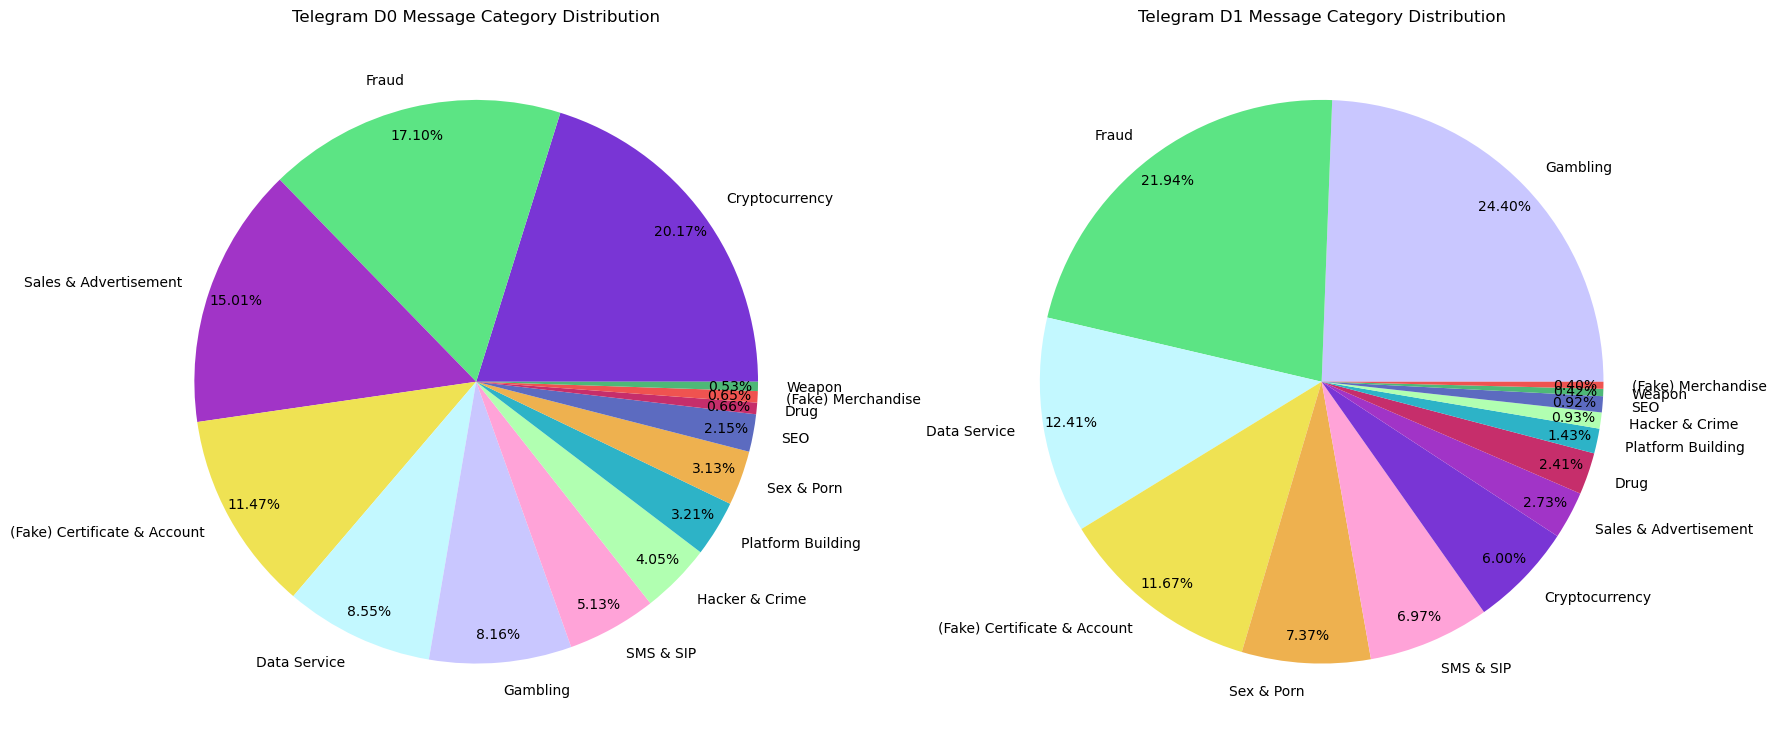

In [3]:
import matplotlib.pyplot as plt
import numpy as np

label_colors = {
    'Sex & Porn': '#EEB14F', 
    '(Fake) Certificate & Account': '#EFE253', 
    'Data Service': '#c3f8ff', 
    'Platform Building': '#2DB3C7',
    'Fraud': '#5CE484',
    'Gambling': '#c9c7ff',
    'SMS & SIP': '#ffa3d8',
    'Cryptocurrency': '#7935D5',
    'Sales & Advertisement': '#A134C7',
    'SEO': '#5C6BC0',
    'Drug': '#C62E6B',
    'Weapon': '#4EB877',
    'Hacker & Crime': '#b1ffb1',
    '(Fake) Merchandise': '#EF5350' 
}

plt.figure(figsize=(20,20))

plt.subplot(1, 2, 1)
df = pd.DataFrame(msg_type_cnt.items(), columns=['Category', 'Occurence']).sort_values('Occurence', ascending=False)
colors = [label_colors.get(label) for label in df['Category']]
plt.pie(df['Occurence'], labels=df['Category'], colors=colors, autopct='%.2f%%', pctdistance=0.9)
plt.title("Telegram D0 Message Category Distribution")

plt.subplot(1, 2, 2)
df = pd.DataFrame(msg_d1_type_cnt.items(), columns=['Category', 'Occurence']).sort_values('Occurence', ascending=False)
colors = [label_colors.get(label) for label in df['Category']]
plt.pie(df['Occurence'], labels=df['Category'], colors=colors, autopct='%.2f%%', pctdistance=0.9)
plt.title("Telegram D1 Message Category Distribution")

plt.show()

**(Fake) Certificate & Account**

```
办证刻章，房产证，行驶证，身份证，结婚证离婚证，户口本。银行流水，营业执照副本。各类章！有需要做的直接私聊群主。你想要的都有。招代理，招徒弟，你拿量，我拿价格给你。@DF5788

专业国外留学文凭制作 各类学校文书材料,一比一制作,百分百一模一样 :   梯塞德大学毕业证  梯塞德大学成绩单  梯塞德大学文凭  梯塞德大学学历证书

🔊 实力车队🚗高价收：🛡银行卡🛡盾卡🛡公户🎖 结算靠谱🎖信誉可鉴 🎖联系方式✈️: @HH3666联系方式✈️: @HH3666诚信经营 ✅ 长期合作✅✅代发联系   请点击这里✅代发联系   请点击这里

【白鹿联盟】TG最大最全 【国内外账号批发刷粉联盟】国内APP账号🔥🔥🔥🔥🔥🔥🔥🔥🔥👑微信账号👑微信企业号👑微信公众号👑QQ账号👑支付宝账号👑陌陌账号👑抖音账号👑快手账号👑小红书账号👑知乎账号👑头条账号👑百合网账号👑世纪佳缘账号👑soul灵魂账号👑探探账号👑他趣账号👑钉钉实名账号👑百度贴吧账号👑微博账号👑蝙蝠账号👑趣约会账号👑积目账号👑花田账号👑伊对账号👑珍爱网账号👑京东账号👑闲鱼账号👑淘宝👑陌陌👑搜狐👑58同城👑拼多多👑阿里云实名账户👑腾讯云实名账户👑华为云实名账户👑天翼云实名账户海外账号组👤👤👤👤👤👤👤👤👤👤👑WhatsApp号👑Facebook号👑友缘号👑instagram号👑twitter号👑telegram电报小号 协议号👑Linkedin 领英号👑Discord不和谐号👑YouTube油管号👑TikTok号👑谷歌GV号👑谷歌邮箱Gmail账户👑火种账号 蓝V定制👑Wechat海外微信👑Facebook商城号👑vpn订阅节点👑海外苹果ID👑礼品卡卷👑三网实名手机卡👑海外邮箱💥💥💥💥💥💥💥💥💥💥全球国家APP 实卡虚拟卡 接码注册👑短信接码👑APP手机号注册🙀🙀TG刷粉低至1元1000粉🙀🙀🙀🙀TG、ins、TikTok、领英、推特、脸书、油管、刷粉、刷浏览、刷关注、刷评论👍🏻TG一手稳定新老号批发，信誉质量第一。
```

**(Fake) Merchandise**

```
w[👜在菲大牌鞋子包包衣服手表首饰👟🌈顶级复刻一比一 ·高端质量· 价格实惠🤩🌈一表一包在手 天下你有😜🌈认准EQ名品 你就是最靓的仔🥳🌟均可货到付款 质量绝对 售后完善😉小姐姐微信：EQDZ-studio小姐姐✈️：@EQDZ21 或 @EQDZ23

😃tAF  ❤️❤️❤️广州高仿复刻名包❤️❤️❤️全球奢侈品牌高端复刻，广州产地一手货源供应链，现货秒发，国内支持货到付款第三平台交易🌼🌼🌼🌼微信号lvlv1854🌼🌼企鹅号290328970🌼🌼飞机号@yanglv🌼🌼频道 (https://t.me/yanglvv)

找寻一起合作做跨境电商美国市场一线名牌精仿，客流量我这边负责，每天保证成交单最少15单以上      你那边主要负责更新产品图片信息，整理出货订单和管理客服，没有任何的前期费用，平均每单纯利50美刀。有意详聊的加飞机号： @cc667788

```

**Cryptocurrency**

```
收Usdt暂定💹汇率💹：   【1000U以下：7.3】 【1000U-4000U: 7.42】 【5000U-1万以上：7.55】  现存🏧汇率和送🚘现金：7.4-7.5   【无法发送消息或双向限制点击此处】   ➡️    【UU达人在线客服】   ⬅️   ➡️    【UU达人在线客服】   ⬅️

可接黑白资，可资金漂白，专业出U，要的联系 bituu107

#CryptosTribe#  (  /C /S /T /C ）币圈今年最强黑马，强势来袭！！！项目推特已更新半年，已积累百万级的顶流热度超级完美的销毁机制史无前例众多社区和机构布局营销打造  /万倍  奇迹,亿万富翁的机会强势来临共识（ 搜 复制）：     HghjjyfsjFDFBB⚡️ 超级NFT游戏已先上线体验 ⚡️

我们只支持USDT交易，因为WX和支付宝风控太多，只能走guo外货币，不会用的可以咨询客服@andybb011

狗狗币搬砖教程： 1、下一个TP钱包（浏览器下载就可以） 2、TP建一个钱包 ，完成后复制我的链接就可以兑换狗狗币 3、最少可以搬20-最多5000U 4、众所周知币圈的人都是“闷声发大财”，你所不了解的搬砖军团。 🌈 🌈🌈简单项目介绍🌈🌈🌈 1.到国外的Dex and Defi Swaps，通俗点说就是在国外Swap平台购买doge币，简称狗币。再售卖到币安，粉红等平台，利用每个平台之间的信息差，赚取中间的差价。 2.只需要你有钱包即可，无需下载APP，无需注册，整个过程简单，5分钟操作两次完全没问题。 3 复制我的推广地址  选择BSC链在钱包的发现界面输入我的推广地址，最小兑换20usdt的doge币，每天可以兑换两次，天天搬砖挣钱，上下级持续收益，Defi Layer2 协议判定作弊，一个设备一天只能兑换两次。 4 查询当日公链上的价格，也可以问我回收价格，你兑换回来的doge币我也包回收。这样就完成了一轮搬砖。 5.合约一天只能搬两次，切记。有不懂的请及时跟我联系

Hello everyone I never believed in cryto currency until I was introduced to 👉 https://blockchain-poly.com/?ref=KumziI've made five more withdrawals after my first from the company. Blockchain is all you need

Do you have a Bitcoin wallet or coinbase Wallet? You can earn up to 0.06021BTC every 3 hours with your phone or PC.... without referrals nor registration fee....lf you are interested ask me How or Click on this link below to join👇👇👇👇👇👇👇👇https://t.me/joinchat/6iZhu0ugd7w2NjFkhttps://t.me/joinchat/6iZhu0ugd7w2NjFkhttps://t.me/joinchat/6iZhu0ugd7w2NjFk

What is Crypto Staking?  Crypto staking is the process of locking up crypto holdings in order to obtain rewards or earn interest.   What reward can I get for Staking J9BC?  You will get USDT reward everyday based on the number of J9 tokens you staked. The more you staked, the more USDT reward.  Can I unstake my J9BC?  Yes, there is auto unstake every Monday, but you can manually unstake whenever you want.  Visit our website for more info :  J9casino.com

ArbiGator ($GATOR/WETH) Dex: SushiSwap Price: $0.01273 (+1920% | 24h) Volume (24h): $15,929 Transactions (24h): 664 MarketCap: $12,734 Liquidity: 1.32 WETH ($2,340.22)

```

**Cybercrime Data Service**

```
博彩数据，手机号码，真人AG 电子游戏 体育 开户存款的精准手机号博彩数据咨询上方客服-谢谢

一手纯数据(航空，证券，基金，股票，车主，学生家长，保健情趣）各种空降类型数据纯女宝妈数据（车主，航空，宝妈app，微信id，抖音宝妈等等）年纪地区运营商可指定过滤银行消费活跃另有全格式车主，法人，房主等数据，适合精料模式售后包含：过库，按要求定制，招代理，一手直出，源头的价格，各种数据一手料，全网数据覆盖，只做真实保真正品  招长期合作老板 以质量为第一 @tqsm6668

新渠道  股民 证券 配资  优质手拨  外呼数据   实时数据，过活跃，实测百5只做股民 证券类数据   只做股民 证券类数据  只做股民 证券类数据 专门对接各大电销团  盘口老板只做高质量数据  懂的来！！！   不懂别过来找骂 ！！！认准唯一客服 @tqsm6668认准唯一客服 @tqsm6668

全球精准华侨数据可分男女年龄‖ 购物‖车主‖房主‖股民‖贷款‖棋牌  领英数据 币圈数据 @chen8878

出全球一手数据，精筛（WS,LINE,TG,FB，ZALO，viber），性别，年龄，头像，以及各国币圈，股民，华侨，棋牌，购物，贷款等各类数据，各国股民粉，交友粉，有需要的联系。

```

**Drug**

```
🎉루이가렐 OPEN 🎉🧊🧊🧊전문 딜러 루이가렐🧊🧊🧊     🇰🇷 서울  최상급 퀄 아이스🇰🇷 ❄️아이스❄️0.5g 40💰0.75g 55 💰1.0g 70💰🔅정직하고 안정적인 체계적인 운영🔅국내 최상급 퀄 ICE 보장 🔅구매자 보안 안전 최 우 선 🔅비트코인거래 수수료 본인부담☎️ 24시간 예약, 문의👉 @gogo048🔞 인증채널 @gogo040

캔디300mg 최상급2필 305필 70케이 케타민1봉 402봉 75문의@pierrot20인증채널@pierrot200

叶子 上头电子烟 上头烟油 LSD 叶子 电子烟LSD THC CBD 肉 笑气 叶子种子 上头烟 烟油

大麻种子出售，种子可以发往全国，请放心购买品种大猩猩OG，丛林破坏，绿色裂纹，Wifi，白寡妇，北极光，臭鼬，等等，都是光周期种子，80天收获，需要雌化种子，请说明，需要那种请说明。Thc24%高@lzcr666

24小时在线     只做精品     诚信为准  墨迹请勿扰     猪肉     钻石     棉花     银针细沙     开心水     红果     白冰     价格优惠，随时可联系

💋十三妹毒品：🔥猪肉-大麻-海洛因-迷药-春药🔥  9O6

【出售各种：迷药，失忆水，快活液，失身粉，催情水，γ-羥基丁酸，氯硝西泮，LSD致幻剂，催情迷幻水，海乐神，弥漫之夜，利他林(聪明药），DMT致幻剂，LSD致幻剂，男性女性春药催情药，听话药，安定片，乙醚，迷香，ghb，麦可奈因，迷奸药，蒙汗药，苍蝇粉，赌博药，失忆药，迷魂药，阿普唑仑，迷幻水，fm2，kkk3药，晕倒药，伟哥七氟醚，阿普唑仑，咪达唑仑，七氟烷，地氟醚】（请勿用于非法用途，本产品仅供部分有需求的人士使用！所有产品都保㊙️发货，先付款后发货，支持USDT付款，支付宝微信等付款）👇🏻👇🏻👇🏻任何需求可直接点击下方链接联系24小时客服👇🏻👇🏻👇🏻🔥  欢迎咨询24x7小时客服，请详细发送您的需求 谢谢！🔥                                  ✈️客服：🔥👉🏻👉🏻👉🏻7x24小时客服👈🏻👈🏻👈🏻🔥✈️客服：🔥👉🏻👉🏻👉🏻7x24小时客服👈🏻👈🏻👈🏻🔥

```

**Fraud**

```
微信小程序项目 跑码打金💰模式 日赚500—1000➕ 想赚快钱💰的看我主叶

支付宝项目 小荷包580一单 小白可做 无风险不封号 缺钱来

急用钱的看过来。招操作手跑分。只要踏实肯干的，帮忙给我们转账走流水。你只管帮我操作 银行卡人头我来找。佣金按照流水的百分之5给你结账。日流水上百万。工资日结。轻轻松松日入过万。@fpf111234

洗资 胆大的来！ 双赢上押1000u 支付宝口领项目 20换50💰《试单》 158换588💰 266换788💰 388换988💰 608换1588💰 支付宝口令项目 急需用💰的来  支付宝单联系电报 @fanfan666666 火速来人做单 有交易记录


```

**Gambling**

```
🌸벳스핀🌸 3+1, 6+2, 9+3 스포츠,카지노,미니게임 롤링100%✅주소 링크 클릭✅http://bspin24.com/가입코드 : AD1🌸가입첫충 3+1, 6+2, 9+3스포츠/카지노 롤링 100%🌸출석체크연속 5만원이상 5일 출석체크시 3만포인트 지급🌸무제한 매충이벤트첫충전 5%, 4회 입금 8%, 5회이후 10%🌸미니게임 연승연패 이벤트5연승+2만, 7연승+5만, 10연승+10만🌸카지노 페이백 5%1일 1회만 참여가능하며 최대 50만원💸출석 이벤트💸5일 연속 출석 - 1만원상품권10일 연속 출석 - 치킨15일 연속 출석 - 피자20일 연속 출석 - 5만원상품권💸오링 이벤트💸10만원 오링 - 스벅한잔 15만원 오링- 상품권 만원20만원 이상오링- 치킨 한마리텔레 @sm594카톡 bs41소민💘51회

🛡 ワイルドウォーカーをブロック 🛡⚰️ 最大96.55%の平均還元率でプレイ⚰️ 最大4,980倍の配当獲得⚰️ 最大8回のフリースピン獲得チャンス！MIN BET: USD 0.20 MAX BET: USD 100🎰 ゲームに参加: https://bit.ly/3zj8fiRサインアップはこちら: https://record.mytopaff.com/_vlaPHdFsC3Iy-buqD6-phWNd7ZgqdRLk/2/?payload=facebookTELEGRAM:https://t.me/EMPIRE777JPBot#ライブカジノ #empire777 #スロット #テーブルゲーム #ジャックポット  #スロットゲーム #EMPIRE777 #japan

Play to Earn J9BCPlay your favorite games, level up and get J9 Token as a reward 🥳The more you bet, the more you get 🤑Register now at  👉 https://j9casino.com/Check J9BC Price 👇 https://www.coingecko.com/en/coins/j9casino/usd


🏆UC哈希全球首家区块链多元化娱乐🏆🌐官方网站：   http://uchash.me/uc/♣️ 哈希大小投注地址 TAuKMYfxkmcsYpsMv5ChSToSexqM466666♠️哈希单双投注地址TQ8aX2VsRNHXdbrkyFFWbCoGgRfZx66666🥇哈希定胆投注地址 TGsMrByZxjLT3PucLnj2m2VPSCdmu66666🍀哈希幸运投注地址TDdqa9GNgDaMjmeTzymBpaGYKmP6X66666💖UC哈希唯一官网：http://uchash.me/uc/✈️UC哈希官方频道：https://t.me/UChash0👩🏻‍💻24小时在线客服： @UChash666   @UChash999

【缅甸博源国际娱乐场】专营：真人百家乐、同步现场娱乐，龙虎，牛牛，电子游戏，捕鱼，棋牌，体育，彩票每日提款无上限， 24小时全免注册

🔥电子易爆分，各种电子游戏，💵加拿大28类、🐮牛牛游戏、🧧红包类、♠️真人视讯、🃏棋牌游戏、⚽️体育竞猜、🎮电竞竞投、🦈捕鱼游戏等供您娱乐  🌐官方注册网址:  https://765d1b156a0fef168d27b6042a28f7fd.c7dp.com/tg/1126119 （复制浏览器下载哦）


```

**Hacker & Crime**

```
一手🌍劫持料，鱼料，出水嘎嘎的！ 品质做派， 备受青睐，每日更新2000+ 八戒塘主✈️@bajie6869  频道查头：@baijiecvv

承接各种网站攻击,服务器攻击APP攻击,平台攻击，流量攻击T级大流量攻击,无视各种防御,指哪打哪！专业解决被劫持的烦恼！无视任何防护支持测试    支持测试     支持测试实力攻击团队在线接单您身边的专业打手咨询联系：@waf78999咨询联系：@waf78999———————————————————-承接各种网站攻击,服务器攻击APP攻击,平台攻击，流量攻击T级大流量攻击,无视各种防御,指哪打哪！专业解决被劫持的烦恼！无视任何防护支持测试    支持测试     支持测试实力攻击团队在线接单您身边的专业打手咨询联系：@waf78999咨询联系：@waf78999

🔥🔥🔥专业攻击小组🔥🔥🔥老牌实力攻击小组，承接灰色攻击攻击：ddos攻击-cc攻击-渗透入侵防御：攻击防护-安全防护-防御测试🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥联系飞机：@ji9ji999欢迎咨询洽谈合作➖➖➖➖➖➖➖➖✅小❤️鹿✅廣告代👉發點擊這裏聯系👈頻道上粉

微信解封业务： 🈶微信人脸三色解封 🈶微信地区非好友解封 🈶QQ解封 滴滴

针孔安装 装好秒结账9000一台.伪基站一小时5000，支持担保双押，联系（@CC119911)

《各种全能查》调取身份、机主信息、名下号车房、出境火车高铁飞机、全家户籍、开房记录、手机定位、通话记录、行车轨迹、查同型车、驾证信息、全码大驾、微信定位、房产查询、快递查询、婚姻查询、大数据找人、补办各种证件、美团淘宝收货地址等等！需要了解请咨询客服号  @Yaowang666

🔥最新公网业务🔥❤️公网个人户籍❤️刑侦全户信息❤️全国名下车❤️犯罪在逃一体❤️护照信息正反查❤️失信人员❤️法人信息❤️工作单位❤️名下公司    开始排队秒查询联系 @Fde1268

✅高速无盲流水  🎲博彩从业者：提供同行入金账户，查询流水及对应手机号 ➤ 获取一手精准客户💰  🤵律师讨债起诉老赖：查老赖全家户籍 ➤ 查全家银行名下卡 ➤ 出流水/余额 ➤ 提告收钱💰  1月、3月、6月、12月    开卡到至今  每个上限1000条 持续出单中，稳定不打洋！  业务对接👉 @MAIZI886


```

**Platform Building**

```
🔥🔥🔥【撘建】最新哈希系统、最新挖矿秒U系统【支持测试】最新交易所、刷单 点赞等各类资金盘✈️ @Debora069

承接 海外 各类资金盘 区块链  数字货币 定制开发《刷单，点赞，交易所微盘，挖矿，NFT链游，商城，互看，医疗，钱包，球盘，贷款，哈希， bc，聊天软件。

专注各类盘口搭建💯交易所💹元宇宙💹NFT链游💹投资理财💹假钱包📲秒U挖矿💥微盘⚡️刷单点赞❤️通讯录等【代运维-出源码】另有各类精聊话术、实战话术

```

**Sales & Advertisement**

```
接电报全类业务：✅群发拉人采集软件出售✅电报广告✅群组拉人✅指定群拉活人✅协议小号出售✅ws，tg，signal，zalo，skypeⓂ️免费测试，欢迎来咨询❇️价格详谈，您满意最重要🔥🔥谨防骗子，影响心情🔥🔥软件演示视频:  @tiangeweiyizhanghao_66666_6

ffdTG自动营销引流软件🦋🍉群-发🍉拉-人🍉私-信🍉炒-群🍉监-听🍉🍉协议号-批发，机器人-定制  🍉🧩免费试用联系： @feiniao008_bot 🍉gsy

僵尸粉   拉人   上粉   点赞    阅读量  A类➡️✈️ 群组/频道✈️拉假粉(订阅)  🔴中文粉✈️0️⃣掉落 1千人 =50元  🔴英文粉✈️0️⃣掉落 1千人 =30元  🔴中文粉✈️0️⃣掉落 1万人 =360元  🔴英文粉✈️0️⃣掉落 1万人 =250元   B类➡️✈️ 拉活人粉✈️指定群组偷人  🔴1千人=270元      🔴5千人=1200元    ☎️联系客服 @bb5220

新浪薇博无限私信技术各种线上行业精准引粉支持免费测试体验🌹微博私信广告代发自动采集指定行业用户  精准私信广告投放有需要的老板滴滴！点击蓝色字体 全部支持免费测试 💙🚁   TOKBBSK210🚁   TOKBBSK210

```

**SEO**

```
【想做什么百度关键词，您说就可以了。就是这么牛逼有实力🔥】百度引流、推广、商业联盟百度首页现词出租、百度搜索—关键词体育、棋牌、菠菜、六合、色站百度首页关键词，上万词霸屏刚上线全行业百度首页词寻实力、先测试后合作，所有词均保证首页☎️联系方式✈️TG：@w100811

谷歌ADS开户，谷歌霸屏广告   不限产业 。任何黑灰产都可以投放👇🏻👇🏻👇🏻直接点下方链接直接联系24小时客服👇🏻👇🏻👇🏻✈️客 服 ：https://t.me/VIP_OTC_3如果双向就联系下发二号客服✈️客 服 ：https://t.me/VIP_OTC_2

百度排名代做，本人只有此一个客服飞机号 @Baidushen【点击账号就可以添加我飞机号：@Baidushen】【点击账号就可以添加我飞机号：@Baidushen】直接好友找我.看到就会回复你🔵🔥🔥百度排名代做🔥🔥 https://t.me/Baidushen 点击与我取得联系

快速收录排名霸屏首页！博彩，网赚，股票，trx挖矿理财，灰产，各个国家语言都可以定做谷歌SEO优化！推广优化收费标准套餐1：【 谷歌收录20万个页面以上，收费2500 U 】套餐2：【 谷歌收录40万个页面以上，收费4500 U 】套餐3：【 谷歌包月收费9000 U，保底收录100万-1000万个页面，上期霸占谷歌前几页排名 】套餐4：【 支持测试，收费300 U ，测试一天】 收录量谷歌可以查，基本会在谷歌前3页内，需提供关键词，跟推广联系方式，推广内容。 然后我可以给你扩展一些关键词，全球语言都可以操作，只保证收录量跟排名。 由于各个行业不同，所以不保证你的客户转化量！承接谷歌seo优化推广，快速收录排名霸屏首页！博彩，网赚，股票，trx挖矿理财，灰产，各个国家语言都可以定做谷歌SEO优化！可以做网址，或者放联系方式，团队上百台服务器操作，优化是一个持续的过程，谷歌海外第一大搜索，流量很大，优化不分国家，只区分语言！TG：@seo919

```

**SMS & SIP**

```

国内一手卡接码 代实名 代开会员 代充值 有需要来骚扰我

🔥🔥   老牌接码平台超值低价   🔥🔥🌕QQ🌕微 信 🌕抖 音🌕支付宝🌕 🐯Tik tok  🐯W S  🐯脸 书 🐯Line 🐯Like 🐯Tin der🐯等🐯🌼电报直登号接/码抵至几毛钱起🔥🌼推出全行业API接/码全部APP可注/册 支持各种短信格式 无限接/码🔥✅专注各大 APP注册一手接/码 🐯 ✅可接发短信换绑🐯 ✅海内 外验 证码🐯 ✅精选 优质 号源🐯 ✅接码 接码 接码🐯🔥接码业务可联系客服或者认准官网🔥官网自助下单  n[http://sms.pet

国际短信钓鱼通道 美国上鱼率🇺🇸w65 新加坡w45 马来w35 加拿大🇨🇦w35 澳洲w50 日本🇯🇵w40 品质有保障 问价不亏

⁣国内🎈三网实卡🎈虚拟卡🎈承接国内各种APP注册业务✨🔥🔥🔥🔥🔥🔥🔥🔥接码✨注册✨代实名

```

**Weapon**

```
💋十三妹军火：🔥手枪-枪支-冲锋枪-格洛克-沙漠之鹰🔥3U1

⚽F 真枪实弹,龍哥军火库,主营手枪,二手手枪   E

💣共济.会军.火：（手.枪-冲.锋.枪-步.枪-狙.击枪-火.箭.筒-手.雷）

```